In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from cmbml.utils.handle_data import get_planck_noise_data, get_planck_obs_data

In [2]:
DATA_ROOT = "/data/jim/CMB_Data/"
ASSETS_DIRECTORY = f"{DATA_ROOT}/Assets/Planck/"
PLANCK_NOISE_DIR = f"{DATA_ROOT}/Assets/PlanckNoise/"

DET = 217

In [3]:
scale = 1 if DET in [545, 857] else 1e6  # Convert to uK unless units are MJy/sr
planck_nse_sim_fn = get_planck_noise_data(DET, PLANCK_NOISE_DIR)
planck_nse_sim = hp.read_map(planck_nse_sim_fn) * scale
# hp.mollview(planck_nse_sim, title=f"Planck {det} GHz Noise")

fn = f"noise_avg_maps/avg_noise_map_{DET}_TQU_100.fits"
planck_nse_avg = hp.read_map(fn) * scale
planck_nse_avg_sm = hp.smoothing(planck_nse_avg, fwhm=np.radians(10/60))

obs_fn = get_planck_obs_data(DET, ASSETS_DIRECTORY)
obs = np.abs(hp.read_map(obs_fn)) * scale

sig_map = np.abs(planck_nse_avg_sm) / np.abs(obs)

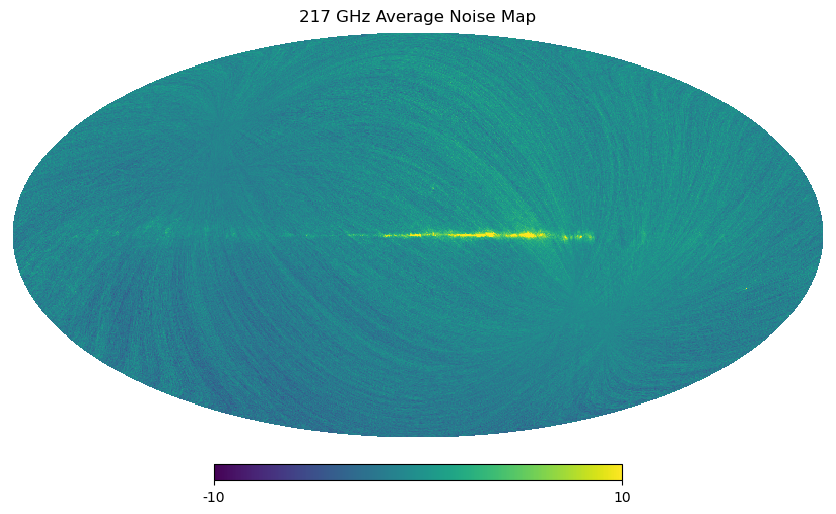

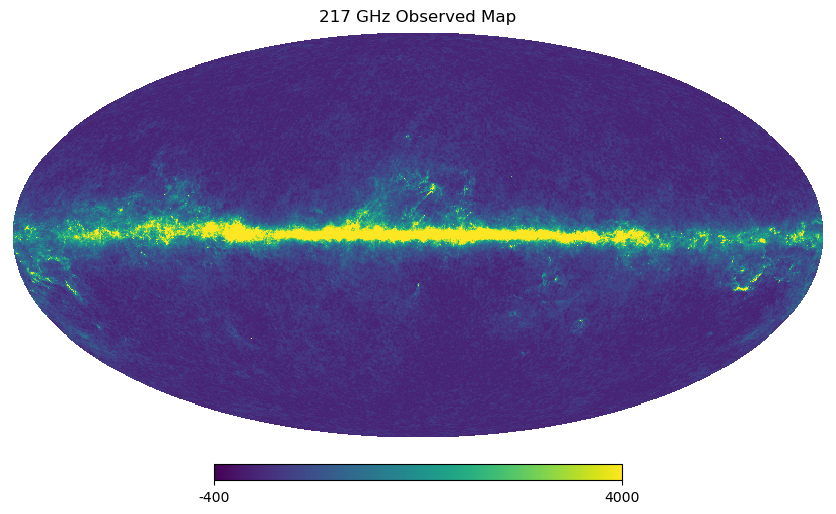

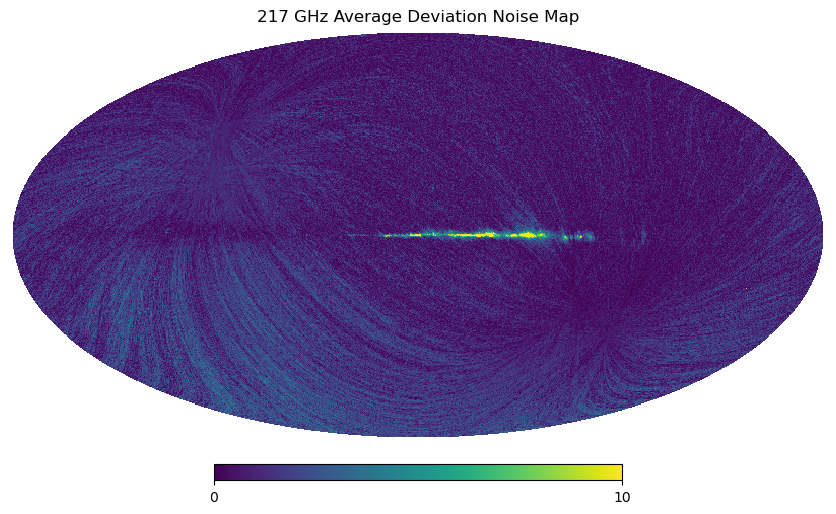

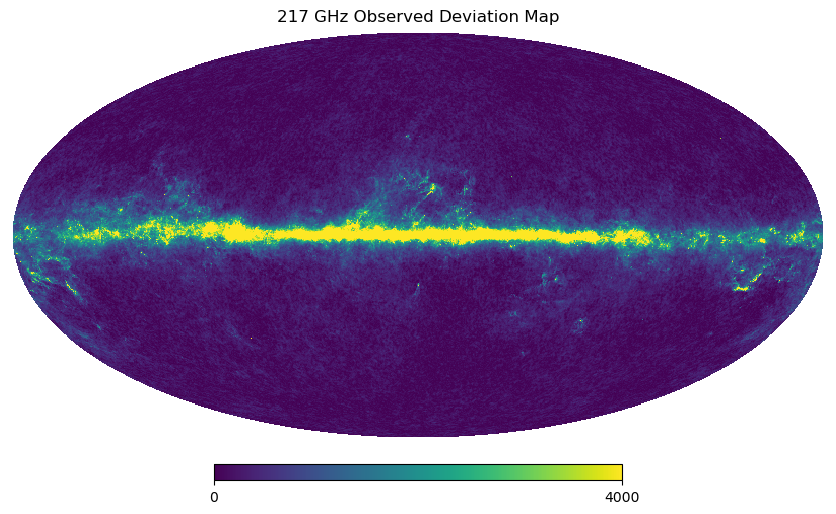

In [8]:
hp.mollview(planck_nse_avg_sm, title=f"{DET} GHz Average Noise Map", min=-10, max=10)
hp.mollview(obs, title=f"{DET} GHz Observed Map", min=-400, max=4000)

hp.mollview(np.abs(planck_nse_avg_sm), title=f"{DET} GHz Average Deviation Noise Map", min=0, max=10)
hp.mollview(np.abs(obs), title=f"{DET} GHz Observed Deviation Map", min=0, max=4000)

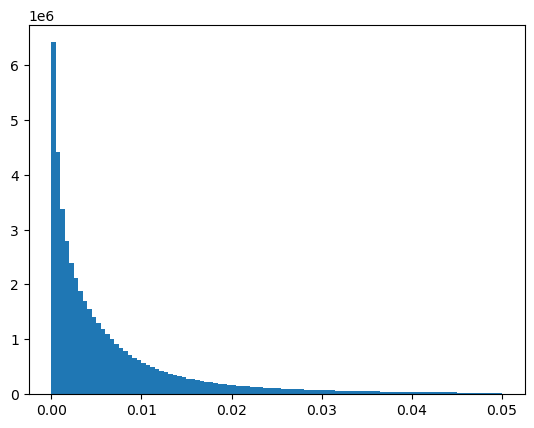

In [5]:
plt.hist(sig_map, bins=100, range=(0, 0.05));

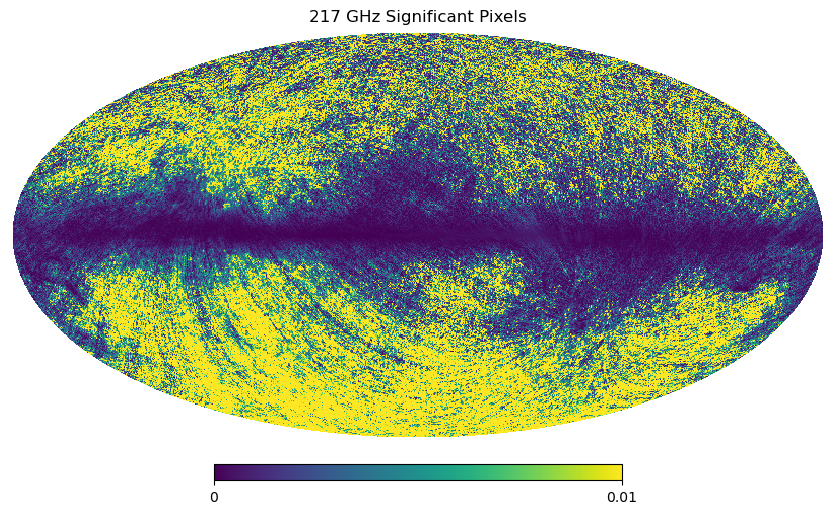

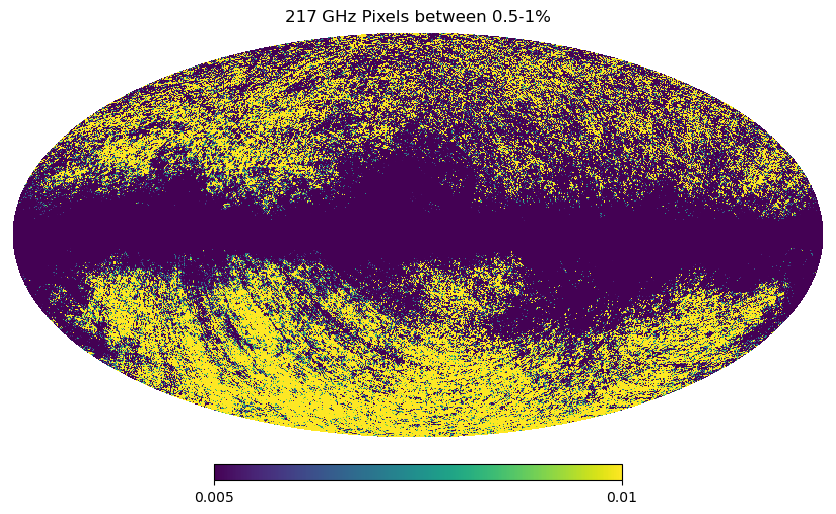

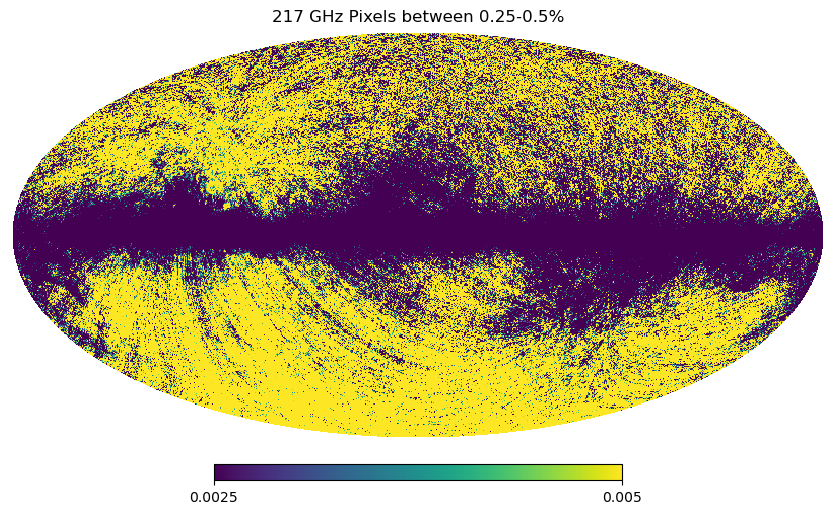

In [6]:
hp.mollview(sig_map, title=f"{DET} GHz Significant Pixels", min=0, max=0.01)
hp.mollview(sig_map, title=f"{DET} GHz Pixels between 0.5-1%", min=0.005, max=0.01)
hp.mollview(sig_map, title=f"{DET} GHz Pixels between 0.25-0.5%", min=0.0025, max=0.005)

# Power Spectra

In [9]:
def plot_many_ps(ps_s,
            title=None, 
            x_low=0.7,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e-2,
            styles=None,
            labels=None,
            white_noise_expected=None,
            legend=True,
            focus_first=False):
    y_label="$N_{\\ell}$" + f"(unit)"
    x_label="$\\ell$"
    plt.figure()
    for i, ps in enumerate(ps_s):
        ells = np.arange(len(ps)).astype(float)
        if x_low < 1:
            ells[0] = x_low
        style=None
        linewidth=None
        color=None
        if styles is None:
            pass
        elif styles[i] != "-":
            style = styles[i]
            linewidth = 2
        else:
            style = styles[i]
            linewidth = 1
        if focus_first and i == 0:
            color='black'
            linewidth=3
        label = None if labels is None else labels[i]
        plt.plot(ells, ps, label=label, linestyle=style, color=color, linewidth=linewidth)
    # if white_noise_expected is not None:
    #     plt.axhline(y=white_noise_expected, color='black', linestyle='--', linewidth=1)
    #     plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
    #              color='black',
    #              horizontalalignment='right', verticalalignment='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([x_low-0.00001, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [10]:
nse_avg_cl = hp.anafast(planck_nse_avg, lmax=2000)
nse_avg_sm_cl = hp.anafast(planck_nse_avg_sm, lmax=2000)
nse_sim_cl = hp.anafast(planck_nse_sim, lmax=2000)

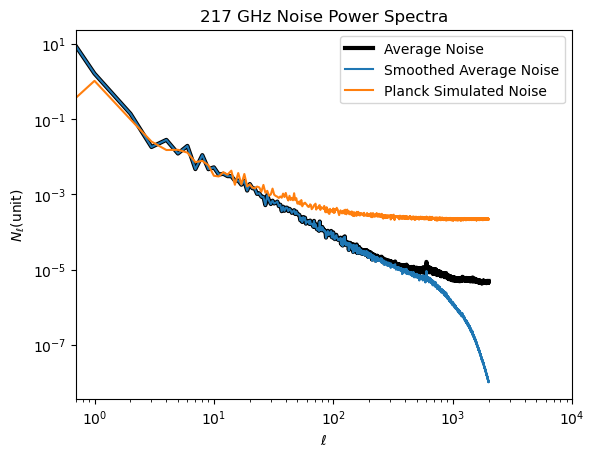

In [15]:
plot_many_ps([nse_avg_cl, nse_avg_sm_cl, nse_sim_cl],
              title=f"{DET} GHz Noise Power Spectra",
              y_low=None,
              y_high=None,
              labels=['Average Noise', 'Smoothed Average Noise', 'Planck Simulated Noise'],
              white_noise_expected=None,
              legend=True,
              focus_first=True)

# Deltas

In [12]:
planck_nse_sim2_fn = planck_nse_sim_fn = get_planck_noise_data(DET, PLANCK_NOISE_DIR, realization=1)
planck_nse_sim2 = hp.read_map(planck_nse_sim2_fn) * scale
nse_sim2_cl = hp.anafast(planck_nse_sim2, lmax=2000)

delta_sims = planck_nse_sim - planck_nse_sim2
delta_sims_cl = hp.anafast(delta_sims, lmax=2000)

delta_sim_avg = planck_nse_sim - planck_nse_avg
delta_sim_avg_cl = hp.anafast(delta_sim_avg, lmax=2000)

delta_sim_avg_sm = planck_nse_sim - planck_nse_avg_sm
delta_sim_avg_sm_cl = hp.anafast(delta_sim_avg_sm, lmax=2000)

planck_nse_sim_sm = hp.smoothing(planck_nse_sim, fwhm=np.radians(10/60))
delta_sim_avg_sm_sm = planck_nse_sim_sm - planck_nse_avg_sm
delta_sim_avg_sm_sm_cl = hp.anafast(delta_sim_avg_sm, lmax=2000)

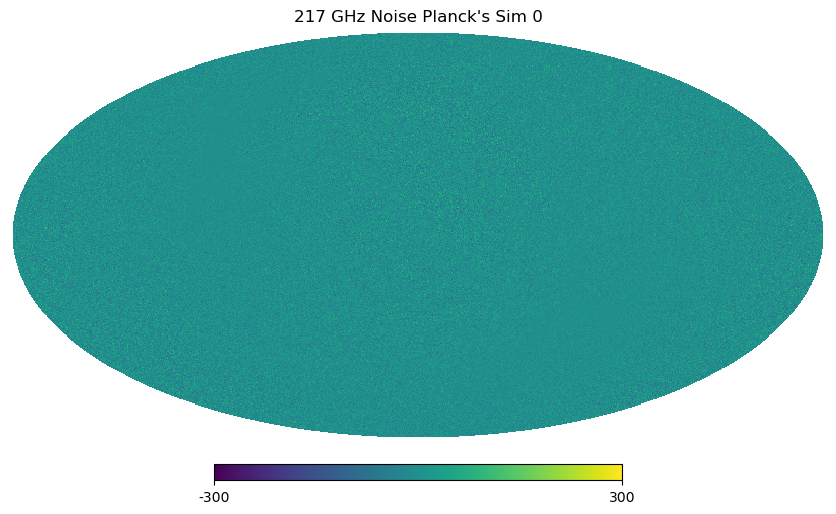

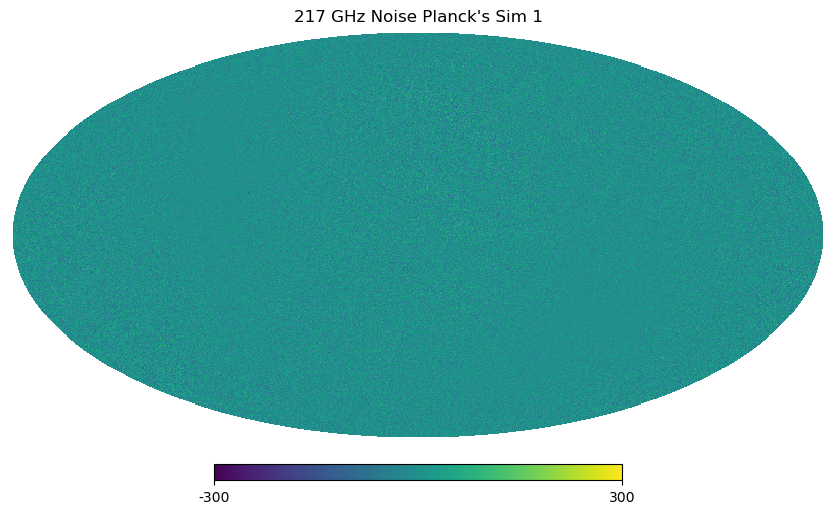

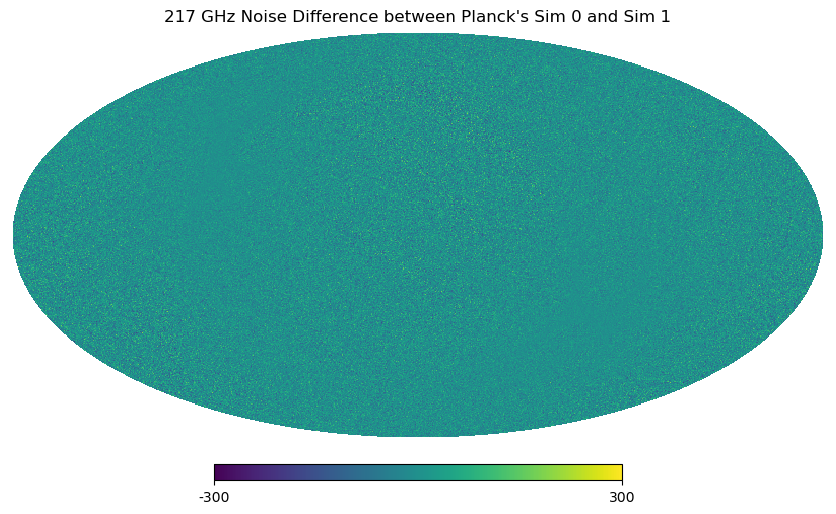

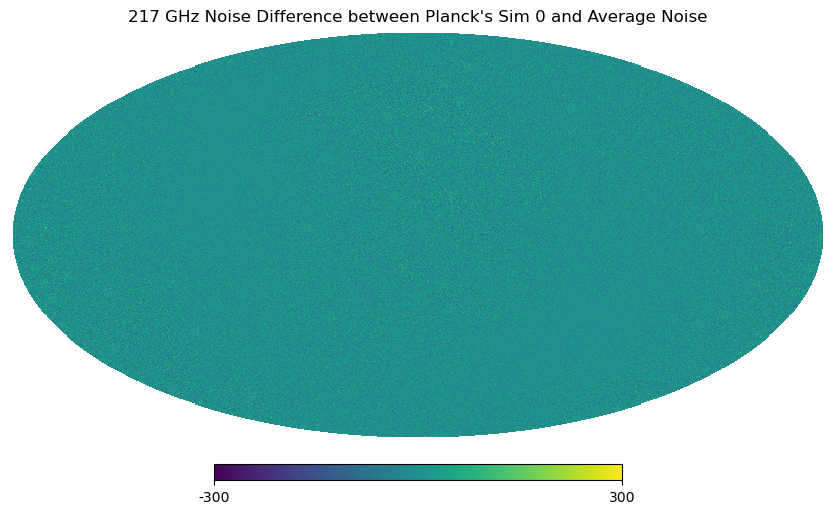

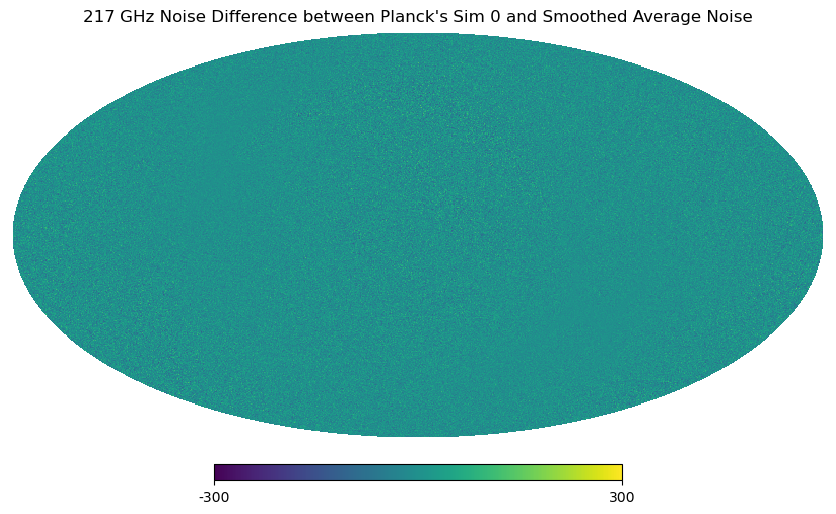

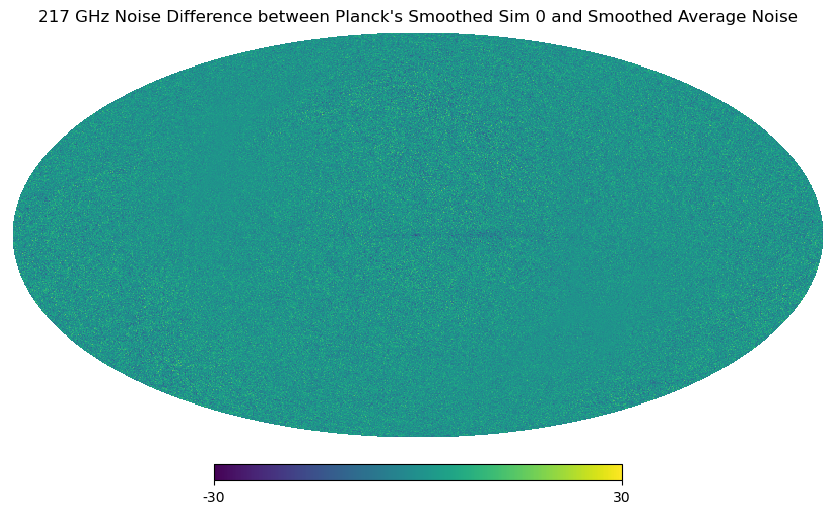

In [17]:
min_max = dict(min=-300, max=300)
hp.mollview(planck_nse_sim, title=f"{DET} GHz Noise Planck's Sim 0", **min_max)
hp.mollview(planck_nse_sim2, title=f"{DET} GHz Noise Planck's Sim 1", **min_max)
hp.mollview(delta_sims, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Sim 1", **min_max)
hp.mollview(delta_sim_avg, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Average Noise", **min_max)
hp.mollview(delta_sim_avg_sm, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Smoothed Average Noise", **min_max)
hp.mollview(delta_sim_avg_sm_sm, title=f"{DET} GHz Noise Difference between Planck's Smoothed Sim 0 and Smoothed Average Noise", min=-30, max=30)

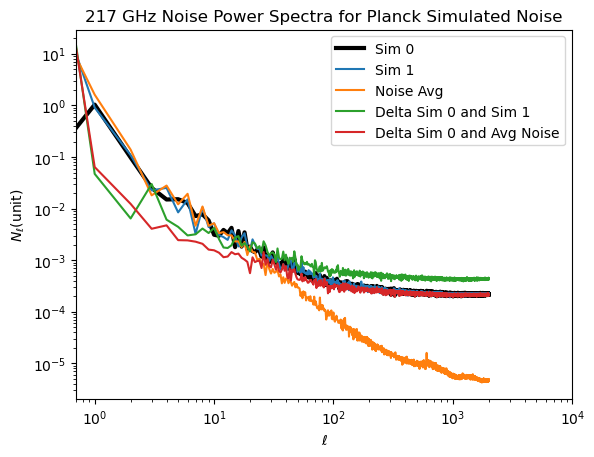

In [18]:
plot_many_ps([
              nse_sim_cl, 
              nse_sim2_cl, 
              nse_avg_cl,
              delta_sims_cl, 
              delta_sim_avg_cl, 
            #   delta_sim_avg_sm_cl, 
            #   delta_sim_avg_sm_sm_cl
              ],
              title=f"{DET} GHz Noise Power Spectra for Planck Simulated Noise",
              y_low=None,
              y_high=None,
              labels=[
                  "Sim 0",
                  "Sim 1",
                  "Noise Avg",
                  "Delta Sim 0 and Sim 1",
                  "Delta Sim 0 and Avg Noise",
                #   "Delta Sim 0 and Sm Avg Noise",
                #   "Delta Sm Sim 0 and Sm Avg Noise"
                  ],
              white_noise_expected=None,
              legend=True,
              focus_first=True)